In [10]:
# библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [11]:
# Загрузка данных
horse = pd.read_csv('horse.csv', sep=',')
horse.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [32]:
# Выбираем нужные данные из таблицы
horse_df=pd.read_csv('horse.csv', sep=',',header=0, usecols=['surgery','age','rectal_temp','pulse','respiratory_rate','packed_cell_volume','total_protein','outcome','surgical_lesion','lesion_1','cp_data'])
horse_df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,cp_data
0,no,adult,38.5,66.0,28.0,45.0,8.4,died,no,11300,no
1,yes,adult,39.2,88.0,20.0,50.0,85.0,euthanized,no,2208,no
2,no,adult,38.3,40.0,24.0,33.0,6.7,lived,no,0,yes
3,yes,young,39.1,164.0,84.0,48.0,7.2,died,yes,2208,yes
4,no,adult,37.3,104.0,35.0,74.0,7.4,died,no,4300,no


In [40]:
# Редактируем данные
horse_df = horse_df.replace('no', 0)
horse_df = horse_df.replace('yes', 1)
horse_df = horse_df.replace('adult', 1)
horse_df = horse_df.replace('young', 0)
horse_df = horse_df.replace('lived', 0)
horse_df = horse_df.replace('euthanized', 1)
horse_df = horse_df.replace('died', 2)
# Удалание NaN, если такие существуют
horse_df=horse_df.dropna() 
horse_df.info()
# Данные для работы
horse_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 298
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surgery             190 non-null    int64  
 1   age                 190 non-null    int64  
 2   rectal_temp         190 non-null    float64
 3   pulse               190 non-null    float64
 4   respiratory_rate    190 non-null    float64
 5   packed_cell_volume  190 non-null    float64
 6   total_protein       190 non-null    float64
 7   outcome             190 non-null    int64  
 8   surgical_lesion     190 non-null    int64  
 9   lesion_1            190 non-null    int64  
 10  cp_data             190 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 17.8 KB


,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,cp_data
0,0,1,38.5,66.0,28.0,45.0,8.4,2,0,11300,0
1,1,1,39.2,88.0,20.0,50.0,85.0,1,0,2208,0
2,0,1,38.3,40.0,24.0,33.0,6.7,0,0,0,1
3,1,0,39.1,164.0,84.0,48.0,7.2,2,1,2208,1
4,0,1,37.3,104.0,35.0,74.0,7.4,2,0,4300,0


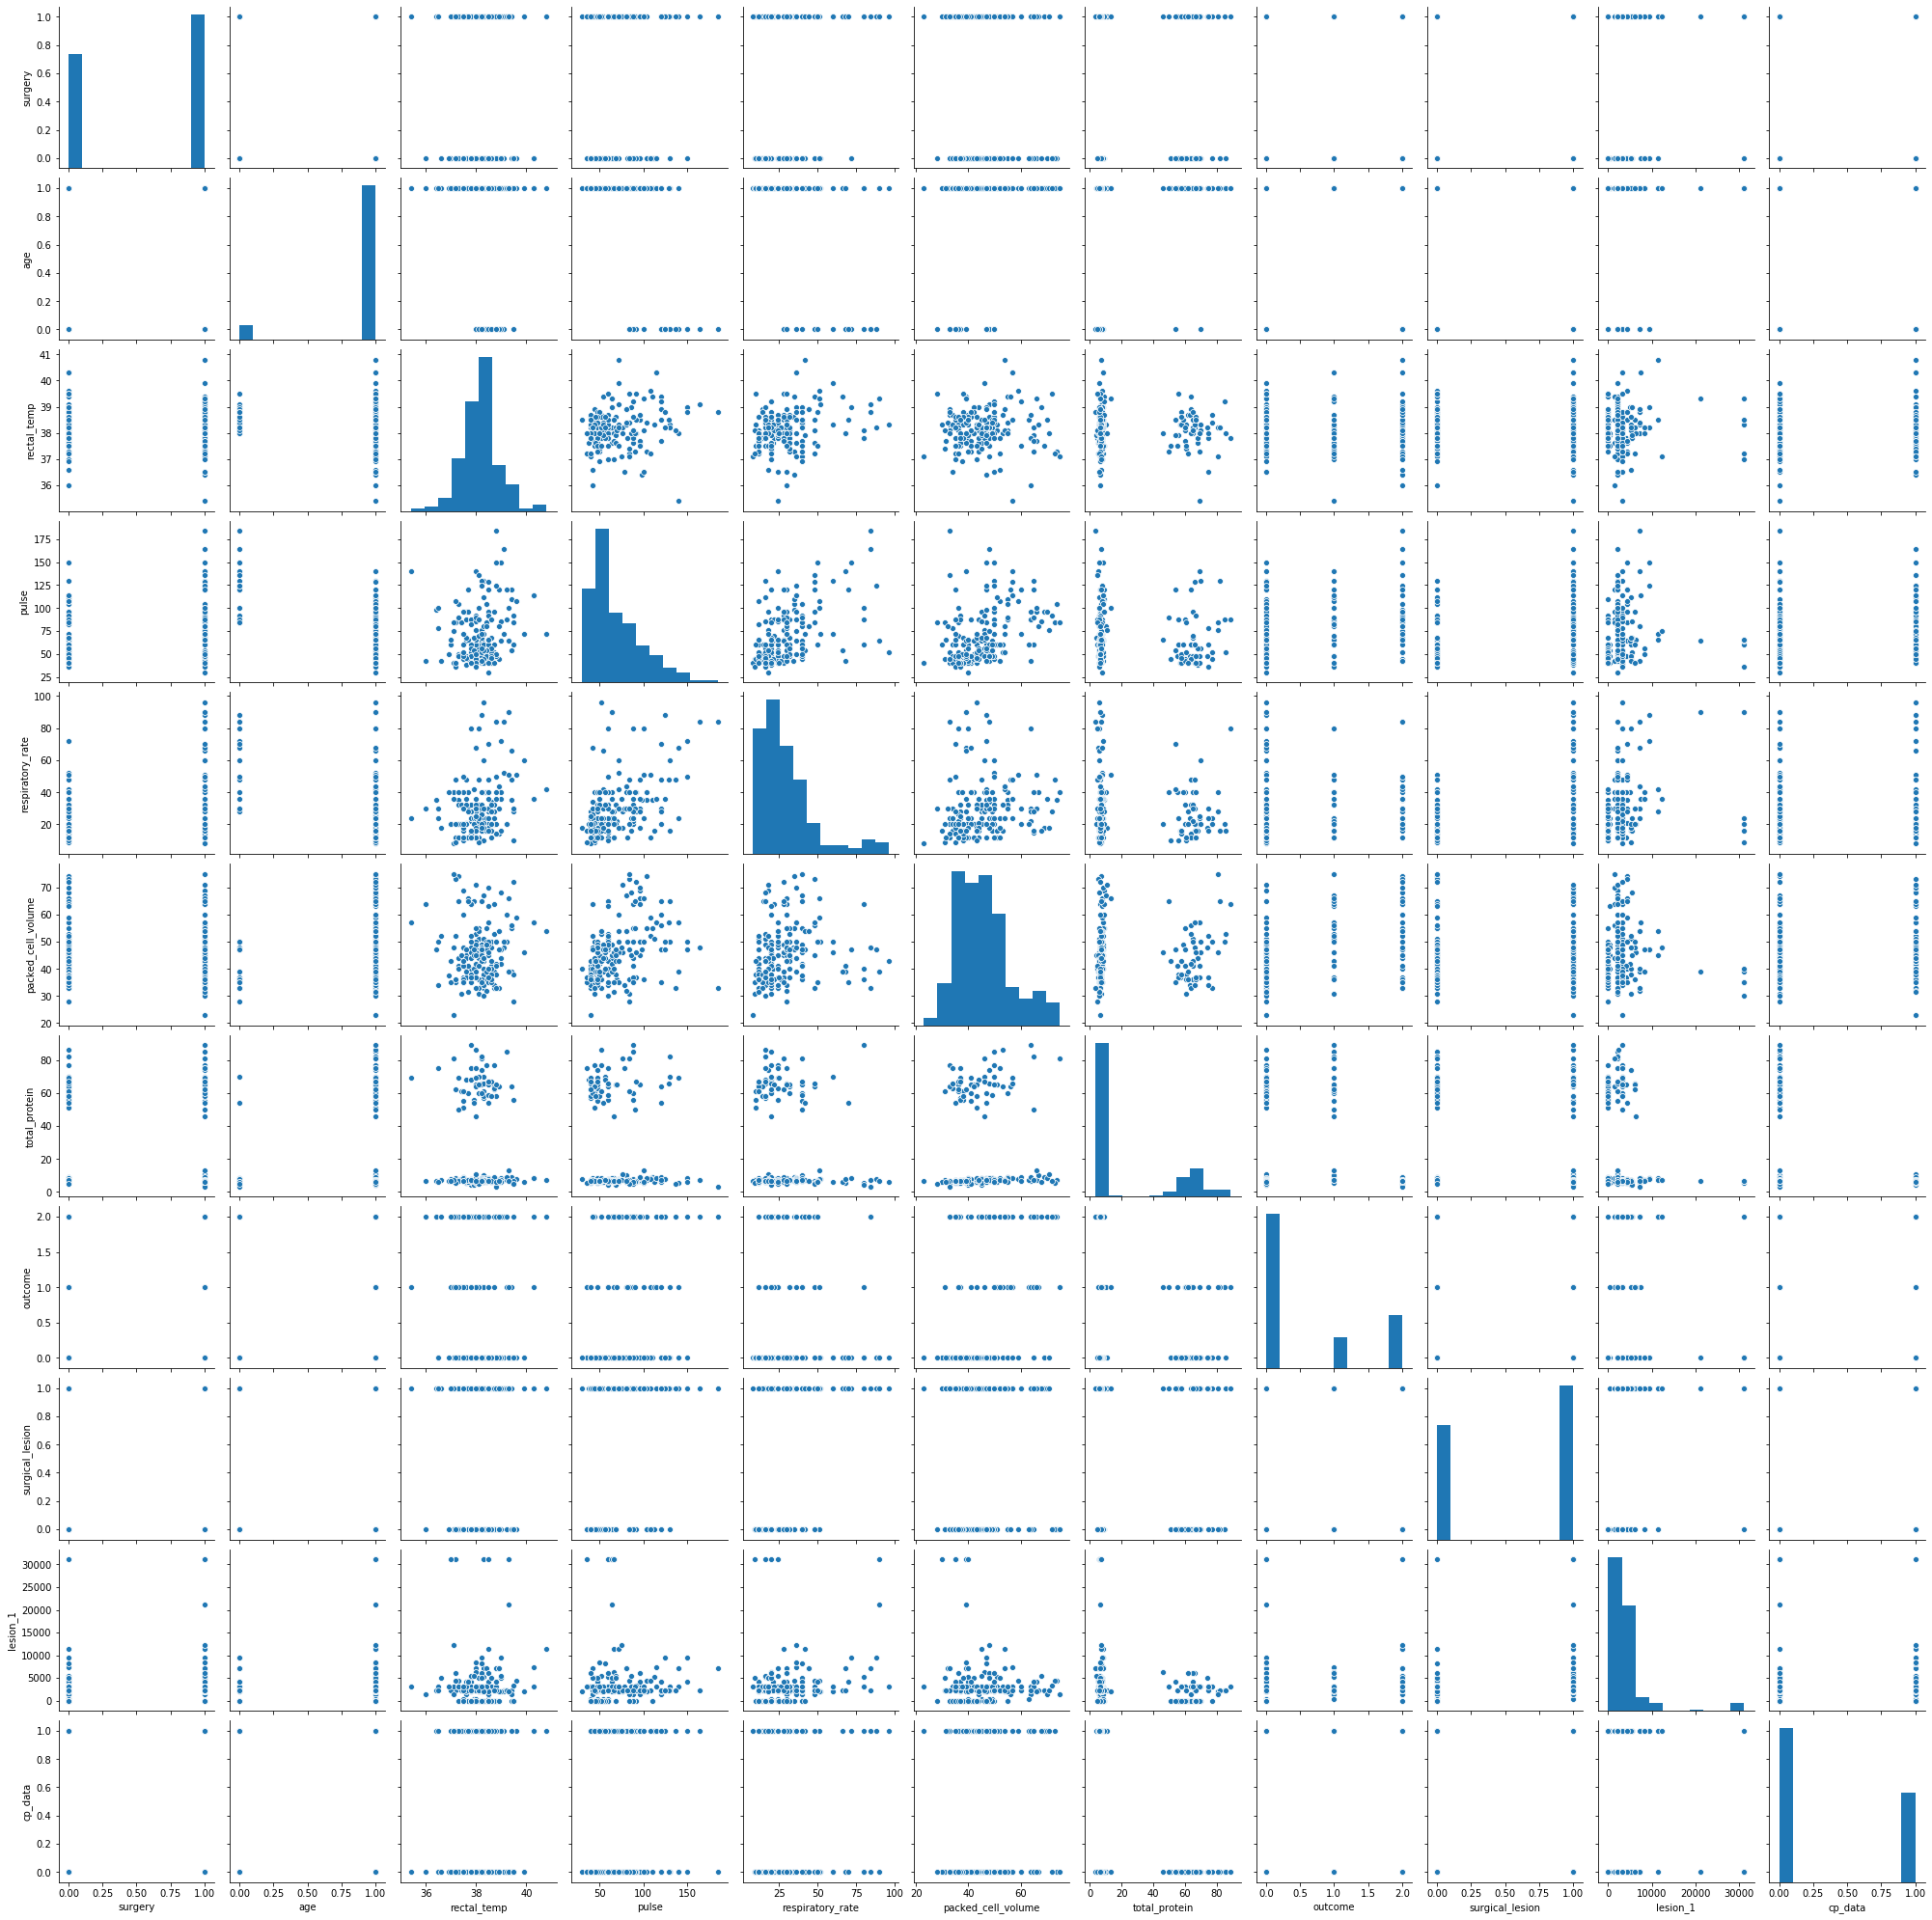

In [81]:
# Диаграммы рассеивания
g = sns.pairplot(horse_df)

In [37]:
#Основные числовые характеристики
horse_df.describe() 

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,cp_data
count,299.000000,299.000000,239.000000,275.000000,241.000000,270.000000,266.000000,299.000000,299.000000,299.000000,299.000000
mean,0.602007,0.919732,38.168619,72.000000,30.460581,46.307407,24.274436,0.662207,0.635452,3659.709030,0.331104
std,0.490305,0.272162,0.733744,28.646219,17.666102,10.436743,27.364194,0.860940,0.482110,5408.472421,0.471399
min,0.000000,0.000000,35.400000,30.000000,8.000000,23.000000,3.300000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,37.800000,48.000000,18.000000,38.000000,6.500000,0.000000,0.000000,2111.500000,0.000000
50%,1.000000,1.000000,38.200000,64.000000,25.000000,45.000000,7.500000,0.000000,1.000000,2322.000000,0.000000
75%,1.000000,1.000000,38.500000,88.000000,36.000000,52.000000,56.750000,2.000000,1.000000,3209.000000,1.000000
max,1.000000,1.000000,40.800000,184.000000,96.000000,75.000000,89.000000,2.000000,1.000000,41110.000000,1.000000


In [41]:
#корреляционная матрица
horse_df.corr()

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,cp_data
surgery,1.000000,-0.108112,-0.055289,0.201012,0.234434,0.028585,0.029899,0.160133,0.634160,0.214580,0.062704
age,-0.108112,1.000000,-0.169355,-0.578092,-0.442540,0.148975,0.129264,-0.110263,-0.108112,-0.007239,-0.043426
rectal_temp,-0.055289,-0.169355,1.000000,0.191299,0.250344,0.039937,-0.043165,-0.048637,-0.024714,0.048154,0.059158
pulse,0.201012,-0.578092,0.191299,1.000000,0.482081,0.384652,-0.095085,0.408771,0.300982,0.069912,0.083312
respiratory_rate,0.234434,-0.442540,0.250344,0.482081,1.000000,0.122054,-0.133948,0.103968,0.295851,0.201727,0.002638
packed_cell_volume,0.028585,0.148975,0.039937,0.384652,0.122054,1.000000,-0.039891,0.407256,0.143566,-0.089825,0.107417
total_protein,0.029899,0.129264,-0.043165,-0.095085,-0.133948,-0.039891,1.000000,-0.227819,-0.150568,-0.199956,-0.496676
outcome,0.160133,-0.110263,-0.048637,0.408771,0.103968,0.407256,-0.227819,1.000000,0.314249,0.096464,0.063756
surgical_lesion,0.634160,-0.108112,-0.024714,0.300982,0.295851,0.143566,-0.150568,0.314249,1.000000,0.268082,0.106830
lesion_1,0.214580,-0.007239,0.048154,0.069912,0.201727,-0.089825,-0.199956,0.096464,0.268082,1.000000,0.025849


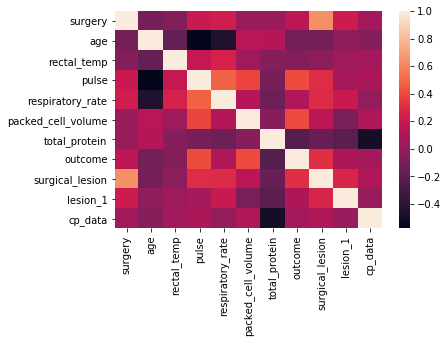

In [42]:
# Тепловая карта
heatmap_plot = sns.heatmap(horse_df.corr())
plt.show()

In [59]:
#Линейная парная регрессия
# pulse & age
featureMeans=[]
featureMeans.append('pulse')
X = horse_df.loc[:,featureMeans]
y = horse_df.loc[:, 'age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model=LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
model.score(X_train,y_train)
r1=model.score(X_train,y_train) #R^2
y_pred=model.predict(X_test)
mse1=np.sqrt(mse(y_test, y_pred)) #Среднеквадратичная ошибка
print('MSE_1: ',mse1)
print('r^2_1: ',r1)

MSE_1:  0.2151214141129237
r^2_1:  0.2734957982248778


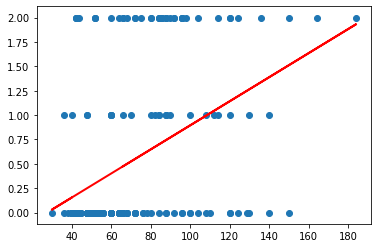

In [95]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red', linewidth=2);

In [97]:
#Линейная парная регрессия
# respiratory_rate & age
featureMeans=[]
featureMeans.append('respiratory_rate')
X = horse_df.loc[:,featureMeans]
y = horse_df.loc[:, 'age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model2=LinearRegression(fit_intercept=True)
model2.fit(X_train,y_train)
model2.score(X_train,y_train)
r2=model2.score(X_train,y_train) #R^2
y_pred=model2.predict(X_test)
mse2=np.sqrt(mse(y_test, y_pred)) #Среднеквадратичная ошибка
print('MSE_2: ',mse2)
print('r^2_2: ',r2)

MSE_2:  0.2693725533281322
r^2_2:  0.1830141529249993


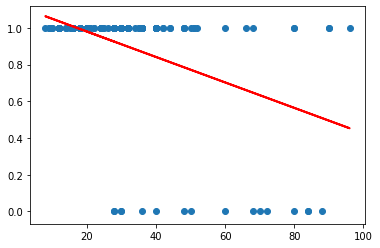

In [98]:
plt.scatter(X, y)
plt.plot(X, model2.predict(X), color='red', linewidth=2);

In [99]:
#Линейная парная регрессия
# cp_data & total_protein
featureMeans=[]
featureMeans.append('pulse')
X = horse_df.loc[:,featureMeans]
y = horse_df.loc[:, 'outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model3=LinearRegression(fit_intercept=True)
model3.fit(X_train,y_train)
model3.score(X_train,y_train)
r3=model3.score(X_train,y_train) #R^2
y_pred=model3.predict(X_test)
mse3=np.sqrt(mse(y_test, y_pred)) #Среднеквадратичная ошибка
print('MSE_3: ',mse3)
print('r^2_3: ',r3)

MSE_3:  0.8969915985933078
r^2_3:  0.1794636651729831


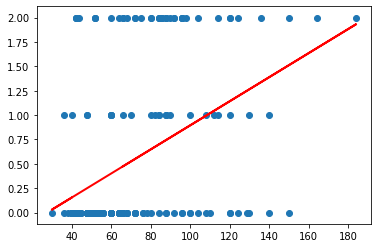

In [100]:
plt.scatter(X, y)
plt.plot(X, model3.predict(X), color='red', linewidth=2);

In [104]:
#Линейная множественная регрессия
featureMeans=[]
featureMeans.append('pulse')
featureMeans.append('outcome')
featureMeans.append('respiratory_rate')
featureMeans.append('surgical_lesion')
featureMeans.append('surgery')
X = horse_df.loc[:,featureMeans]
y = horse_df.loc[:, 'age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model4=LinearRegression(fit_intercept=True)
model4.fit(X_train,y_train)
model4.score(X_train,y_train)
r4=model4.score(X_train,y_train)
y_pred=model4.predict(X_test)
y_pred1=model4.predict(X_train)
mse4=np.sqrt(mse(y_test, y_pred))
print('MSE_4: ',mse4)
print('R^2_4: ',r4)

MSE_4:  0.21818280782443128
R^2_4:  0.3479140345135189


TypeError: hlines() missing 2 required positional arguments: 'xmin' and 'xmax'

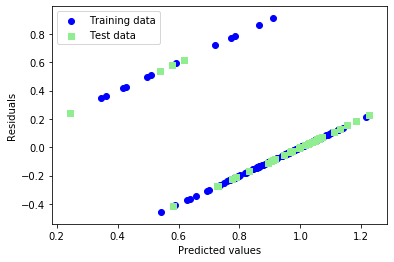

In [110]:
# Residuals plot. 
# # Поскольку в нашей модели несколько независимых переменных, мы не можем отобразить их зависимость на двумерном пространстве, 
# но можем нанести на график связь между остатками модели и предсказанными значениями, 
# что также поможет нам диагностировать качество модели. 
# C его помощью мы можем увидет нелинейность и выбросы, проверить случайность распределения ошибки.
plt.scatter(y_pred1,  y_pred1 - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_pred,  y_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')

In [80]:
# регрессия Риджа
model= Ridge(alpha=0.01)
model.fit(X_train, y_train)
y_pred1r = model.predict(X_test)
mse_r=np.sqrt(mse(y_test, y_pred1r))
r_r=model.score(X_train, y_train)
print("MSE", mse_r)
print("R^2",r_r)

MSE 0.3633019759321763
R^2 0.42352495900177645


In [78]:
# регрессия Лассо
model = Lasso()
model.fit(X_train, y_train)
y_pred_l = model.predict(X_test)
mse_l=np.sqrt(mse(y_test, y_pred_l))
r_l=model.score(X_train, y_train)
print("MSE", mse_l)
print("R^2",r_l)

MSE 0.4931770677429719
R^2 0.08188352438512103


In [79]:
#Полиномиальная регрессия
lin = LinearRegression()
lin.fit(X, y)
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
r=lin2.score(X_poly, y)
print(r)

0.49642212014027126


In [93]:
# Сравнение результатов
RL=['LinReg(pulse&age)','LinReg(respiratory_rate&age)','LinReg(pulse&outcome)','LinReg(age)','Ridge','Lasso','Poly']
col=['R^2','MSE']
otchet=pd.DataFrame([[r1,mse1],[r2,mse2],[r3,mse3],[r4,mse4],[r_r,mse_r],[r_l,mse_l],[r,'-']], index=RL, columns=col)
otchet

,R^2,MSE
LinReg(pulse&age),0.273496,0.215121
LinReg(respiratory_rate&age),0.183014,0.269373
LinReg(pulse&outcome),0.179464,0.896992
LinReg(age),0.347914,0.218183
Ridge,0.423525,0.363302
Lasso,0.081884,0.493177
Poly,0.496422,-
